In [1]:
import pandas as pd
df = pd.read_csv("playtennis.csv")
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
#changing all the values to numerical values (all in one go)

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [4]:
#Solving using ID3 Algorithm 

X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()


#ID3 classifier
from sklearn.tree import DecisionTreeClassifier
model_id3 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2)

model_id3.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [7]:
#predicting the values
pred_id3 = model_id3.predict(X)

from sklearn.metrics import confusion_matrix
cm_id3 = confusion_matrix(Y,pred_id3)
print(cm_id3)

[[4 1]
 [1 8]]


In [9]:
#getting individual values of all

TN, FP, FN, TP = confusion_matrix(list(Y), list(pred_id3), labels=[0, 1]).ravel() #0,1 is default label of sklearn 
print("True Negatives", TN)
print("True Positives", TP)
print("False Positives", FP)
print("False Negatives", FN)

True Negatives 4
True Positives 8
False Positives 1
False Negatives 1


In [10]:
results={} #To Store all the metrics Result Values
#Finding Accuracy 
metric = "ACCURACY"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}") 
#Note the Formatting with f"{metric} and rounding to 3 decimal points with .3f

ACCURACY is  0.857


In [11]:
#Finding MCC Value

metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC is  0.689


In [12]:
#Precision 
print(f"Precision is : {TP / (TP + FN)}")

#RECALL 
print(f"Recall is : {TP/ (TP + FN)}")

#SENSTIVITY 
print(f"Senstivity is : {TP / (TP + FN)}")

#SPECIFICITY 
print(f"Specificity is : {TN / (TN + FP)}")

Precision is : 0.8888888888888888
Recall is : 0.8888888888888888
Senstivity is : 0.8888888888888888
Specificity is : 0.8


[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.5, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]')]

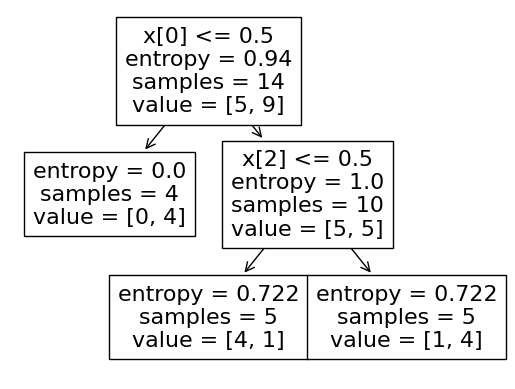

In [13]:
from sklearn import tree
tree.plot_tree(model_id3)

In [14]:
#Solving the same using CART Algorithm 

#Solving using ID3 Algorithm 

X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()


#cart classifier
from sklearn.tree import DecisionTreeClassifier
model_cart = DecisionTreeClassifier(criterion = 'gini',max_depth = 2)

model_id3.fit(X,Y)


DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [16]:
model_cart.fit(X,Y)
pred_cart = model_cart.predict(X)
cm_cart = confusion_matrix(Y,pred_cart)
print(cm_cart)

[[4 1]
 [1 8]]


In [17]:
#We find all the other values in the same way as we found for the ID3 Algorithm

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.5, 'x[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]')]

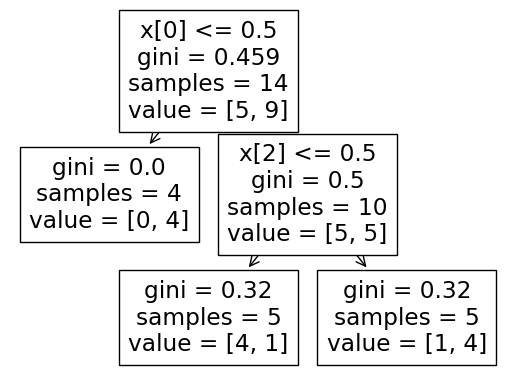

In [18]:
tree.plot_tree(model_cart)